<a href="https://colab.research.google.com/github/Pyeonseohee/Deeplearning/blob/main/Datascience_Post_Covid19_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## POST-COVID19 데이터 시각화 경진대회

* 가설 1: 코로나 이후 노래방과 주점의 매출 발생 건수가 줄어들었을 것이다.

필요한 library 불러오기

In [56]:
import pandas as pd
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
import datetime

google drive mount 해준 뒤, card.csv 파일 읽기
head() 함수는 파일 간단히 보여줌.

In [57]:
card = pd.read_csv('/content/drive/MyDrive/Post_Covid19/card_20200717.csv')
card.head()

,receipt_dttm,adstrd_code,adstrd_nm,mrhst_induty_cl_code,mrhst_induty_cl_nm,selng_cascnt,salamt
0,20200104,1174066000,성내3동,7041,약국,463,5843230
1,20200104,1174066000,성내3동,7022,치과의원,33,7835550
2,20200104,1174066000,성내3동,7021,한의원,53,4589800
3,20200104,1174066000,성내3동,7020,의원,339,9267240
4,20200104,1174066000,성내3동,6110,자동차정비,19,4441000


* receipt_dttm : 카드 회사가 카드 사용 내역을 접수한 일자

* adstrd_code : 가맹점 위치 기준 행정동 코드

* adstrd_nm : 가맹점 위치 기준 행정동명

* mrhst_induty_cl_code : 가맹점 업종 코드

* mrhst_induty_cl_nm : 가맹점 업종명

* selng_cascnt : 매출 발생 건수

* selng_cascnt : 매출 발생 건수

* salamt : 매출발생금액

card의 receipt_dttm열의 data type 확인

In [58]:
type(card['receipt_dttm'][0])

numpy.int64

numpy type이므로 data type을 timestamp type으로 변환.

In [59]:
card['receipt_dttm'].astype(str)

0          20200104
1          20200104
2          20200104
3          20200104
4          20200104
             ...   
3713947    20200614
3713948    20200614
3713949    20200614
3713950    20200614
3713951    20200614
Name: receipt_dttm, Length: 3713952, dtype: object

In [61]:
time_list = card['receipt_dttm'].astype(str).tolist()
time_list[:10] # 너무 많아 일부 추출

['20200104',
 '20200104',
 '20200104',
 '20200104',
 '20200104',
 '20200104',
 '20200104',
 '20200104',
 '20200104',
 '20200104']

In [62]:
for i in range(len(time_list)):
    time_list[i] = time_list[i][:4] + "-" + time_list[i][4:6] + "-" + time_list[i][6:]
time_list[:10] # 마찬가지로 일부만 추출

['2020-01-04',
 '2020-01-04',
 '2020-01-04',
 '2020-01-04',
 '2020-01-04',
 '2020-01-04',
 '2020-01-04',
 '2020-01-04',
 '2020-01-04',
 '2020-01-04']

In [63]:
card['receipt_dttm'] = pd.to_datetime(Series(time_list))
card.head()

,receipt_dttm,adstrd_code,adstrd_nm,mrhst_induty_cl_code,mrhst_induty_cl_nm,selng_cascnt,salamt
0,2020-01-04,1174066000,성내3동,7041,약국,463,5843230
1,2020-01-04,1174066000,성내3동,7022,치과의원,33,7835550
2,2020-01-04,1174066000,성내3동,7021,한의원,53,4589800
3,2020-01-04,1174066000,성내3동,7020,의원,339,9267240
4,2020-01-04,1174066000,성내3동,6110,자동차정비,19,4441000


바뀐 card['receipt_dttm'] type 확인.

In [64]:
type(card['receipt_dttm'][0])

pandas._libs.tslibs.timestamps.Timestamp

card 파일에서 'receipt_dttm', 'adstrd_nm', 'mrhst_induty_cl_nm'을 기준으로 'selng_cascnt' 합산.

In [65]:
group = card.groupby(['receipt_dttm', 'adstrd_nm', 'mrhst_induty_cl_nm'])['selng_cascnt'].sum()
group.head()

receipt_dttm  adstrd_nm  mrhst_induty_cl_nm
2020-01-04    가락1동       기타유통업                   15
                         기타음료식품                 462
                         농축수산가공품                 63
                         농축수산품                 1337
                         미 용 원                   15
Name: selng_cascnt, dtype: int64

group에서 이태원1동의 주점 매출발생건수 확인

In [66]:
group[:, '이태원1동', '주점']

receipt_dttm
2020-01-04    244
2020-01-05    595
2020-01-06    535
2020-01-07     65
2020-01-08     80
             ... 
2020-06-10     42
2020-06-11     61
2020-06-12     84
2020-06-13     95
2020-06-14    149
Name: selng_cascnt, Length: 155, dtype: int64

In [67]:
df = DataFrame(group[:, '이태원1동', '주점'])
df

,selng_cascnt
receipt_dttm,
2020-01-04,244
2020-01-05,595
2020-01-06,535
2020-01-07,65
2020-01-08,80
...,...
2020-06-10,42
2020-06-11,61
2020-06-12,84


* 시각화하기

Text(0.5, 1.0, 'Bar_sell_sum')

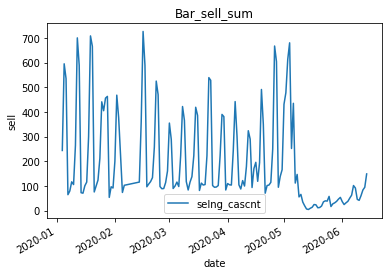

In [82]:
df.plot()
plt.xlabel('date')
plt.ylabel('sell')
plt.title('Bar_sell_sum')

In [70]:
card[-5:]

,receipt_dttm,adstrd_code,adstrd_nm,mrhst_induty_cl_code,mrhst_induty_cl_nm,selng_cascnt,salamt
3713947,2020-06-14,1121586000,구의2동,4004,대형할인점,136,1195640
3713948,2020-06-14,1121584700,자양4동,9010,인테 리어,2,13100
3713949,2020-06-14,1162052500,보라매동,6140,주 차 장,2,14500
3713950,2020-06-14,1135056000,월계1동,9998,기타전문점,1,38000
3713951,2020-06-14,1159060500,흑석동,9204,사무통신기기수리,1,20000


6월이 너무 적게 나와 data의 경계값 확인 -> 14일까지밖에 합계 안됨 -> 비교가 어렵다.

* 코로나 확진자 데이터

In [71]:
confirm = pd.read_csv('/content/drive/MyDrive/Post_Covid19/Time.csv')
confirm.head()

,date,time,test,negative,confirmed,released,deceased
0,2020-01-20,16,1,0,1,0,0
1,2020-01-21,16,1,0,1,0,0
2,2020-01-22,16,4,3,1,0,0
3,2020-01-23,16,22,21,1,0,0
4,2020-01-24,16,27,25,2,0,0


In [72]:
type(confirm['date'][0])

str

이미 type이 str 데이터이므로 바꿀 필요 없이 timestamps type으로 변환

In [73]:
confirm['date'] = pd.to_datetime(confirm['date'])
confirm.head()

,date,time,test,negative,confirmed,released,deceased
0,2020-01-20,16,1,0,1,0,0
1,2020-01-21,16,1,0,1,0,0
2,2020-01-22,16,4,3,1,0,0
3,2020-01-23,16,22,21,1,0,0
4,2020-01-24,16,27,25,2,0,0


변환된 데이터 type 확인

In [74]:
type(confirm['date'][0])

pandas._libs.tslibs.timestamps.Timestamp

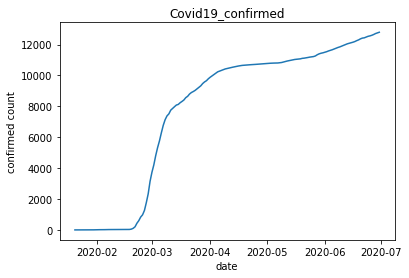

In [75]:
plt.plot(confirm['date'], confirm['confirmed'])
plt.xlabel('date')
plt.ylabel('confirmed count')
plt.title('Covid19_confirmed')
plt.show()

코로나 확진자 경과 그래프와 이태원1동 주점의 매출 발생 건수 시각화

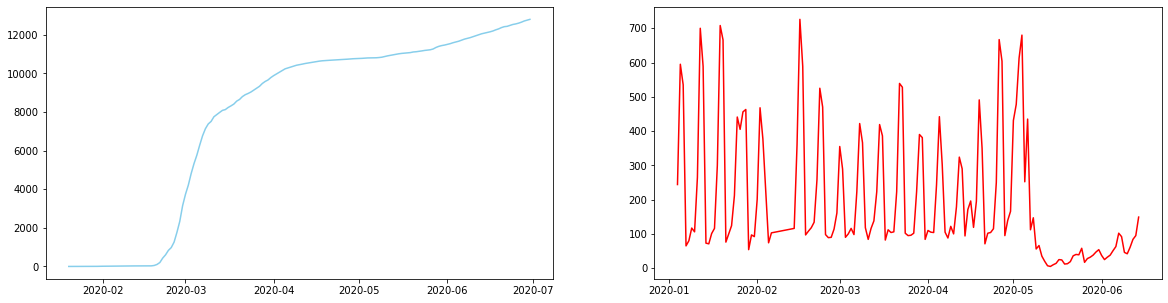

In [79]:
fig, ax = plt.subplots(1, 2, figsize=(20, 5))
ax[0].plot(confirm['date'], confirm['confirmed'], color = 'skyblue')
ax[1].plot(df.index, df['selng_cascnt'], color = 'red')
plt.show()

이태원1동의 노래방 매출발생건수 시각화

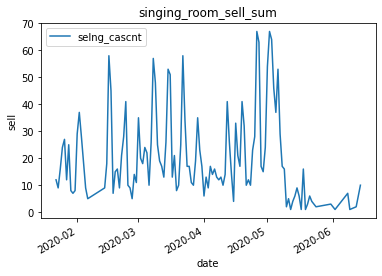

In [81]:
df2 = DataFrame(group[:, '이태원1동', '노래방'])
df2.plot()
plt.xlabel('date')
plt.ylabel('sell')
plt.title('singing_room_sell_sum')
plt.show()

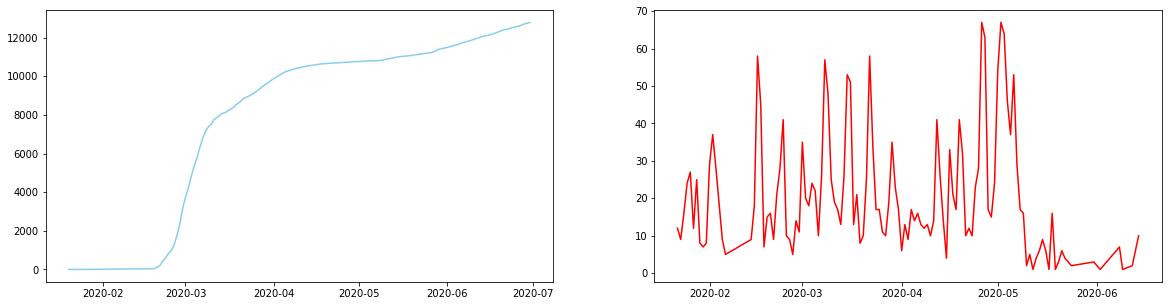

In [89]:
fig, ax = plt.subplots(1, 2, figsize=(20, 5))
ax[0].plot(confirm['date'], confirm['confirmed'], color = 'skyblue')
ax[1].plot(df2.index, df2['selng_cascnt'], color = 'red')
plt.show()

모든 행정동에서의 주점 매출발생건수 확인하기

In [84]:
group2 = card.groupby(['receipt_dttm', 'mrhst_induty_cl_nm'])['selng_cascnt'].sum()
group2.head()

receipt_dttm  mrhst_induty_cl_nm
2020-01-04    1급 호텔                   38
              CATV홈쇼핑               4769
              가   방                   83
              가전 제품                  972
              가정용품수리                  33
Name: selng_cascnt, dtype: int64

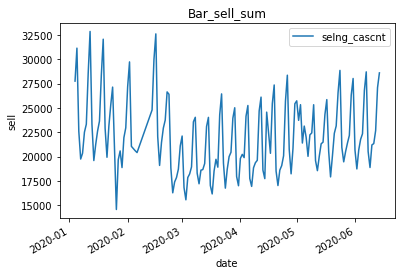

In [86]:
Bar = DataFrame(group2[:, '주점'])
Bar.plot()
plt.xlabel('date')
plt.ylabel('sell')
plt.title('Bar_sell_sum')
plt.show()

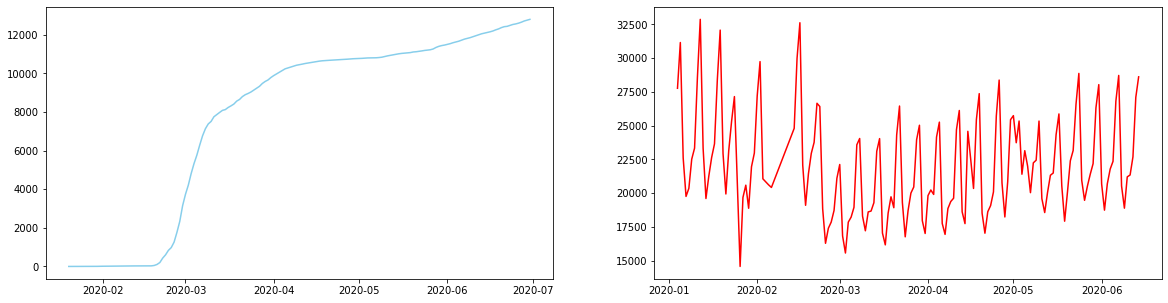

In [88]:
fig, ax = plt.subplots(1, 2, figsize=(20, 5))
ax[0].plot(confirm['date'], confirm['confirmed'], color = 'skyblue')
ax[1].plot(Bar.index, Bar['selng_cascnt'], color = 'red')
plt.show()

모든 행정동에서의 노래방 매출발생건수 보기

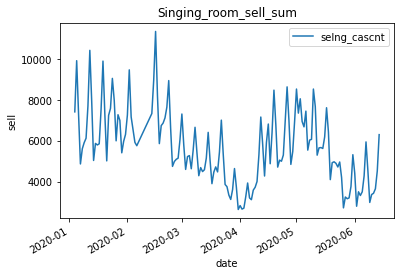

In [91]:
singing_room = DataFrame(group2[:, '노래방'])
singing_room.plot()
plt.xlabel('date')
plt.ylabel('sell')
plt.title('Singing_room_sell_sum')
plt.show()

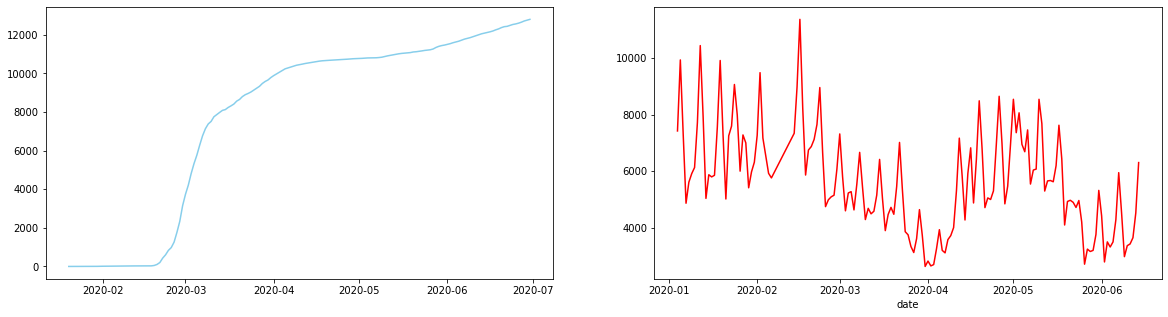

In [92]:
fig, ax = plt.subplots(1, 2, figsize=(20, 5))
ax[0].plot(confirm['date'], confirm['confirmed'], color = 'skyblue')
ax[1].plot(singing_room.index, singing_room['selng_cascnt'], color = 'red')
plt.xlabel('date')
plt.show()

# 결론
 : 모든 행정동의 주점과 노래방 매출 합산 결과, 코로나가 급격히 증가한 3월 중순 이후로 감소된 것을 볼 수 있다.

* 가설 2: 코로나 이후 피부과를 다니는 사람들이 많아질 것이다.

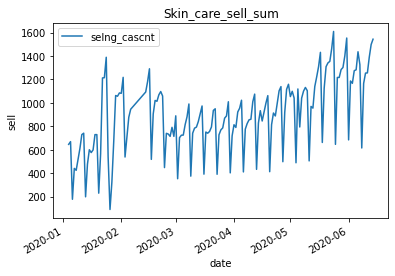

In [95]:
skin_care = DataFrame(group2[:, '피부미용실'])
skin_care.plot()
plt.xlabel('date')
plt.ylabel('sell')
plt.title('Skin_care_sell_sum')
plt.show()

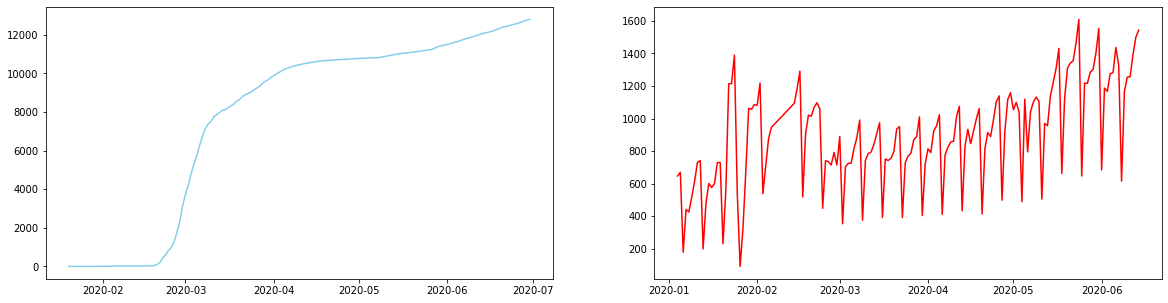

In [96]:
fig, ax = plt.subplots(1, 2, figsize=(20, 5))
ax[0].plot(confirm['date'], confirm['confirmed'], color = 'skyblue')
ax[1].plot(skin_care.index, skin_care['selng_cascnt'], color = 'red')
plt.show()

# 결론
 : 모든 행정동의 피부과 매출 합산 결과, 코로나가 급격히 증가한 3월 중순 이후로 증가된 것을 볼 수 있다.

합계 말고 평균으로 데이터 측정하기

In [97]:
average = card.groupby(['receipt_dttm', 'mrhst_induty_cl_nm'])['selng_cascnt'].mean()
average.head()

receipt_dttm  mrhst_induty_cl_nm
2020-01-04    1급 호텔                   38.000000
              CATV홈쇼핑               2384.500000
              가   방                   13.833333
              가전 제품                   64.800000
              가정용품수리                  33.000000
Name: selng_cascnt, dtype: float64

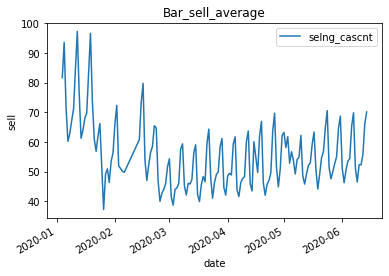

In [98]:
Bar_average = DataFrame(average[:, '주점'])
Bar_average.plot()
plt.xlabel('date')
plt.ylabel('sell')
plt.title('Bar_sell_average')
plt.show()

주점 매출 건수 평균으로 데이터 비교하기

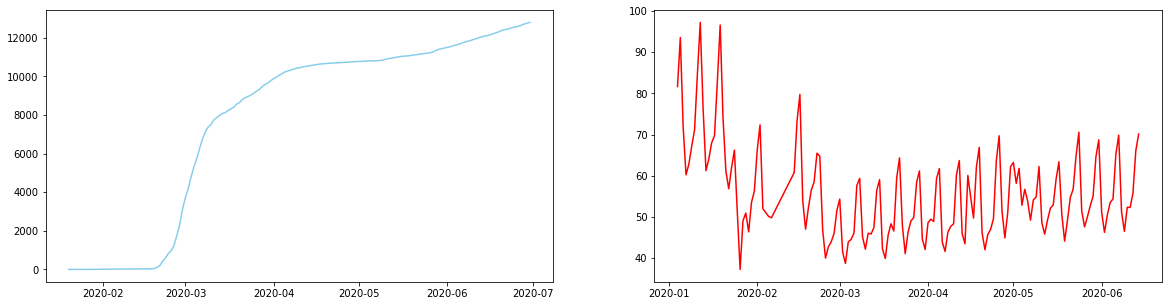

In [100]:
fig, ax = plt.subplots(1, 2, figsize=(20, 5))
ax[0].plot(confirm['date'], confirm['confirmed'], color = 'skyblue')
ax[1].plot(Bar_average.index, Bar_average['selng_cascnt'], color = 'red')
plt.show()

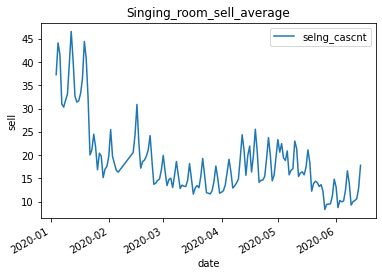

In [101]:
singing_room_average = DataFrame(average[:, '노래방'])
singing_room_average.plot()
plt.xlabel('date')
plt.ylabel('sell')
plt.title('Singing_room_sell_average')
plt.show()

노래방 매출 건수 평균으로 데이터 비교하기

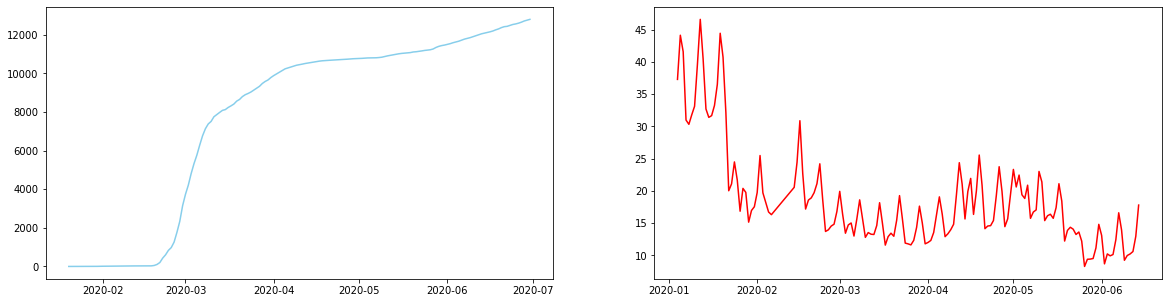

In [103]:
fig, ax = plt.subplots(1, 2, figsize=(20, 5))
ax[0].plot(confirm['date'], confirm['confirmed'], color = 'skyblue')
ax[1].plot(singing_room_average.index, singing_room_average['selng_cascnt'], color = 'red')
plt.show()

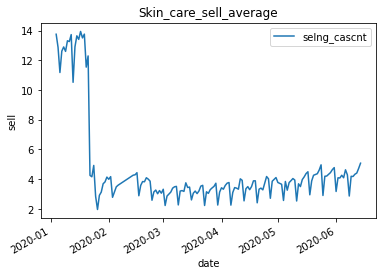

In [104]:
skin_care_average = DataFrame(average[:, '피부미용실'])
skin_care_average.plot()
plt.xlabel('date')
plt.ylabel('sell')
plt.title('Skin_care_sell_average')
plt.show()

피부과 매출 건수 평균으로 데이터 비교하기

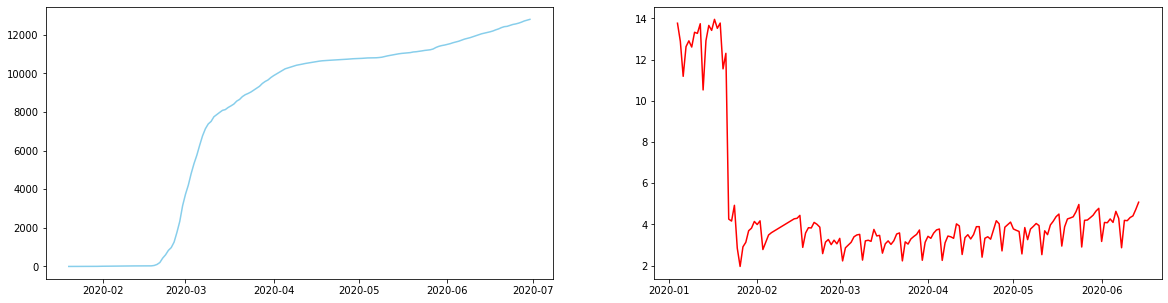

In [105]:
fig, ax = plt.subplots(1, 2, figsize=(20, 5))
ax[0].plot(confirm['date'], confirm['confirmed'], color = 'skyblue')
ax[1].plot(skin_care_average.index, skin_care_average['selng_cascnt'], color = 'red')
plt.show()

매출 건수 평균으로 봤을 때도 주점, 노래방, 피부과의 결과는 동일한 것을 볼 수 있다.